# Loading necessary library

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Loading the data

In [62]:
df = pd.read_csv(r"E:\downloads\archive\credit_train.csv")
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0


## Features/attribute 

In [5]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## datatype of features

In [6]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

### we  will convert the feature "Years in current job" to float64. It is represented as object because it contain strings and mathematical notation (e.g 8 years,10+ years). We will use excel's find and replace funtion to remove those string and mathematical notation.

## Summary of data

In [7]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## Visualizing data using histogram and pairplot

## visualizing numerical features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B653695CC0>,
      dtype=object)

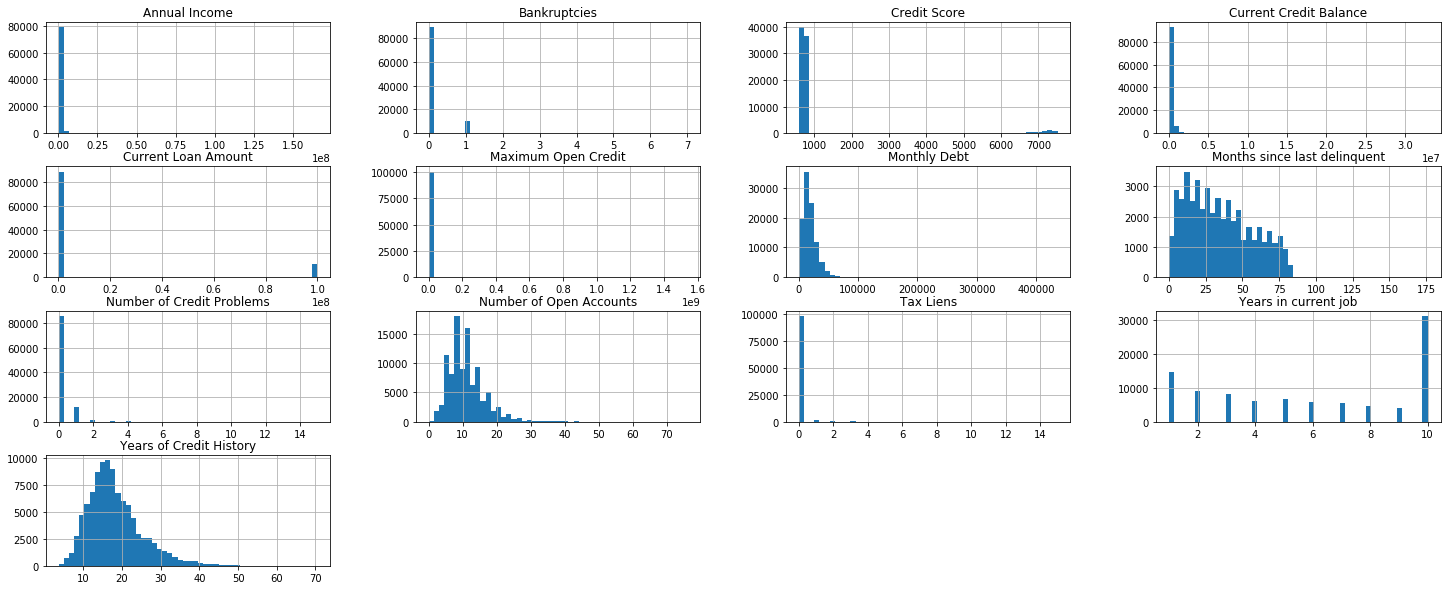

In [46]:
df.hist(bins=50,figsize=(25,10))

## visulizing categorical features

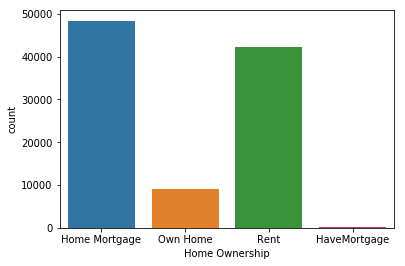

In [10]:
sns.countplot('Home Ownership',data=df)

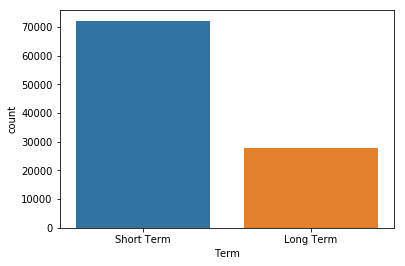

In [12]:
sns.countplot('Term',data=df)

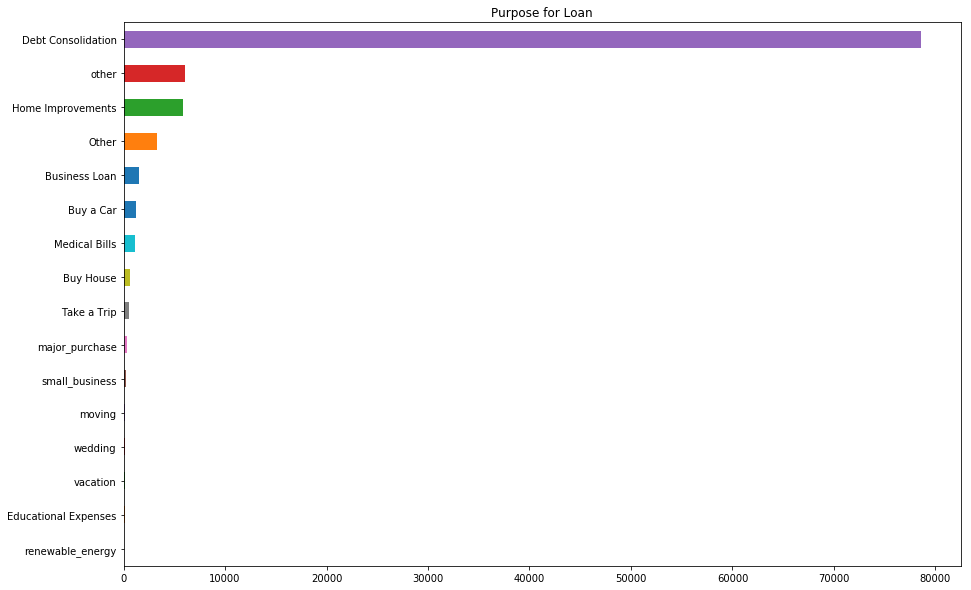

In [11]:
df['Purpose'].value_counts().sort_values(ascending=True).plot(kind='barh', 
                    title="Purpose for Loan", figsize=(15,10))

In [47]:
X = df[['Loan Status','Current Loan Amount','Credit Score','Annual Income','Years in current job','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]
X.dropna(inplace=True)

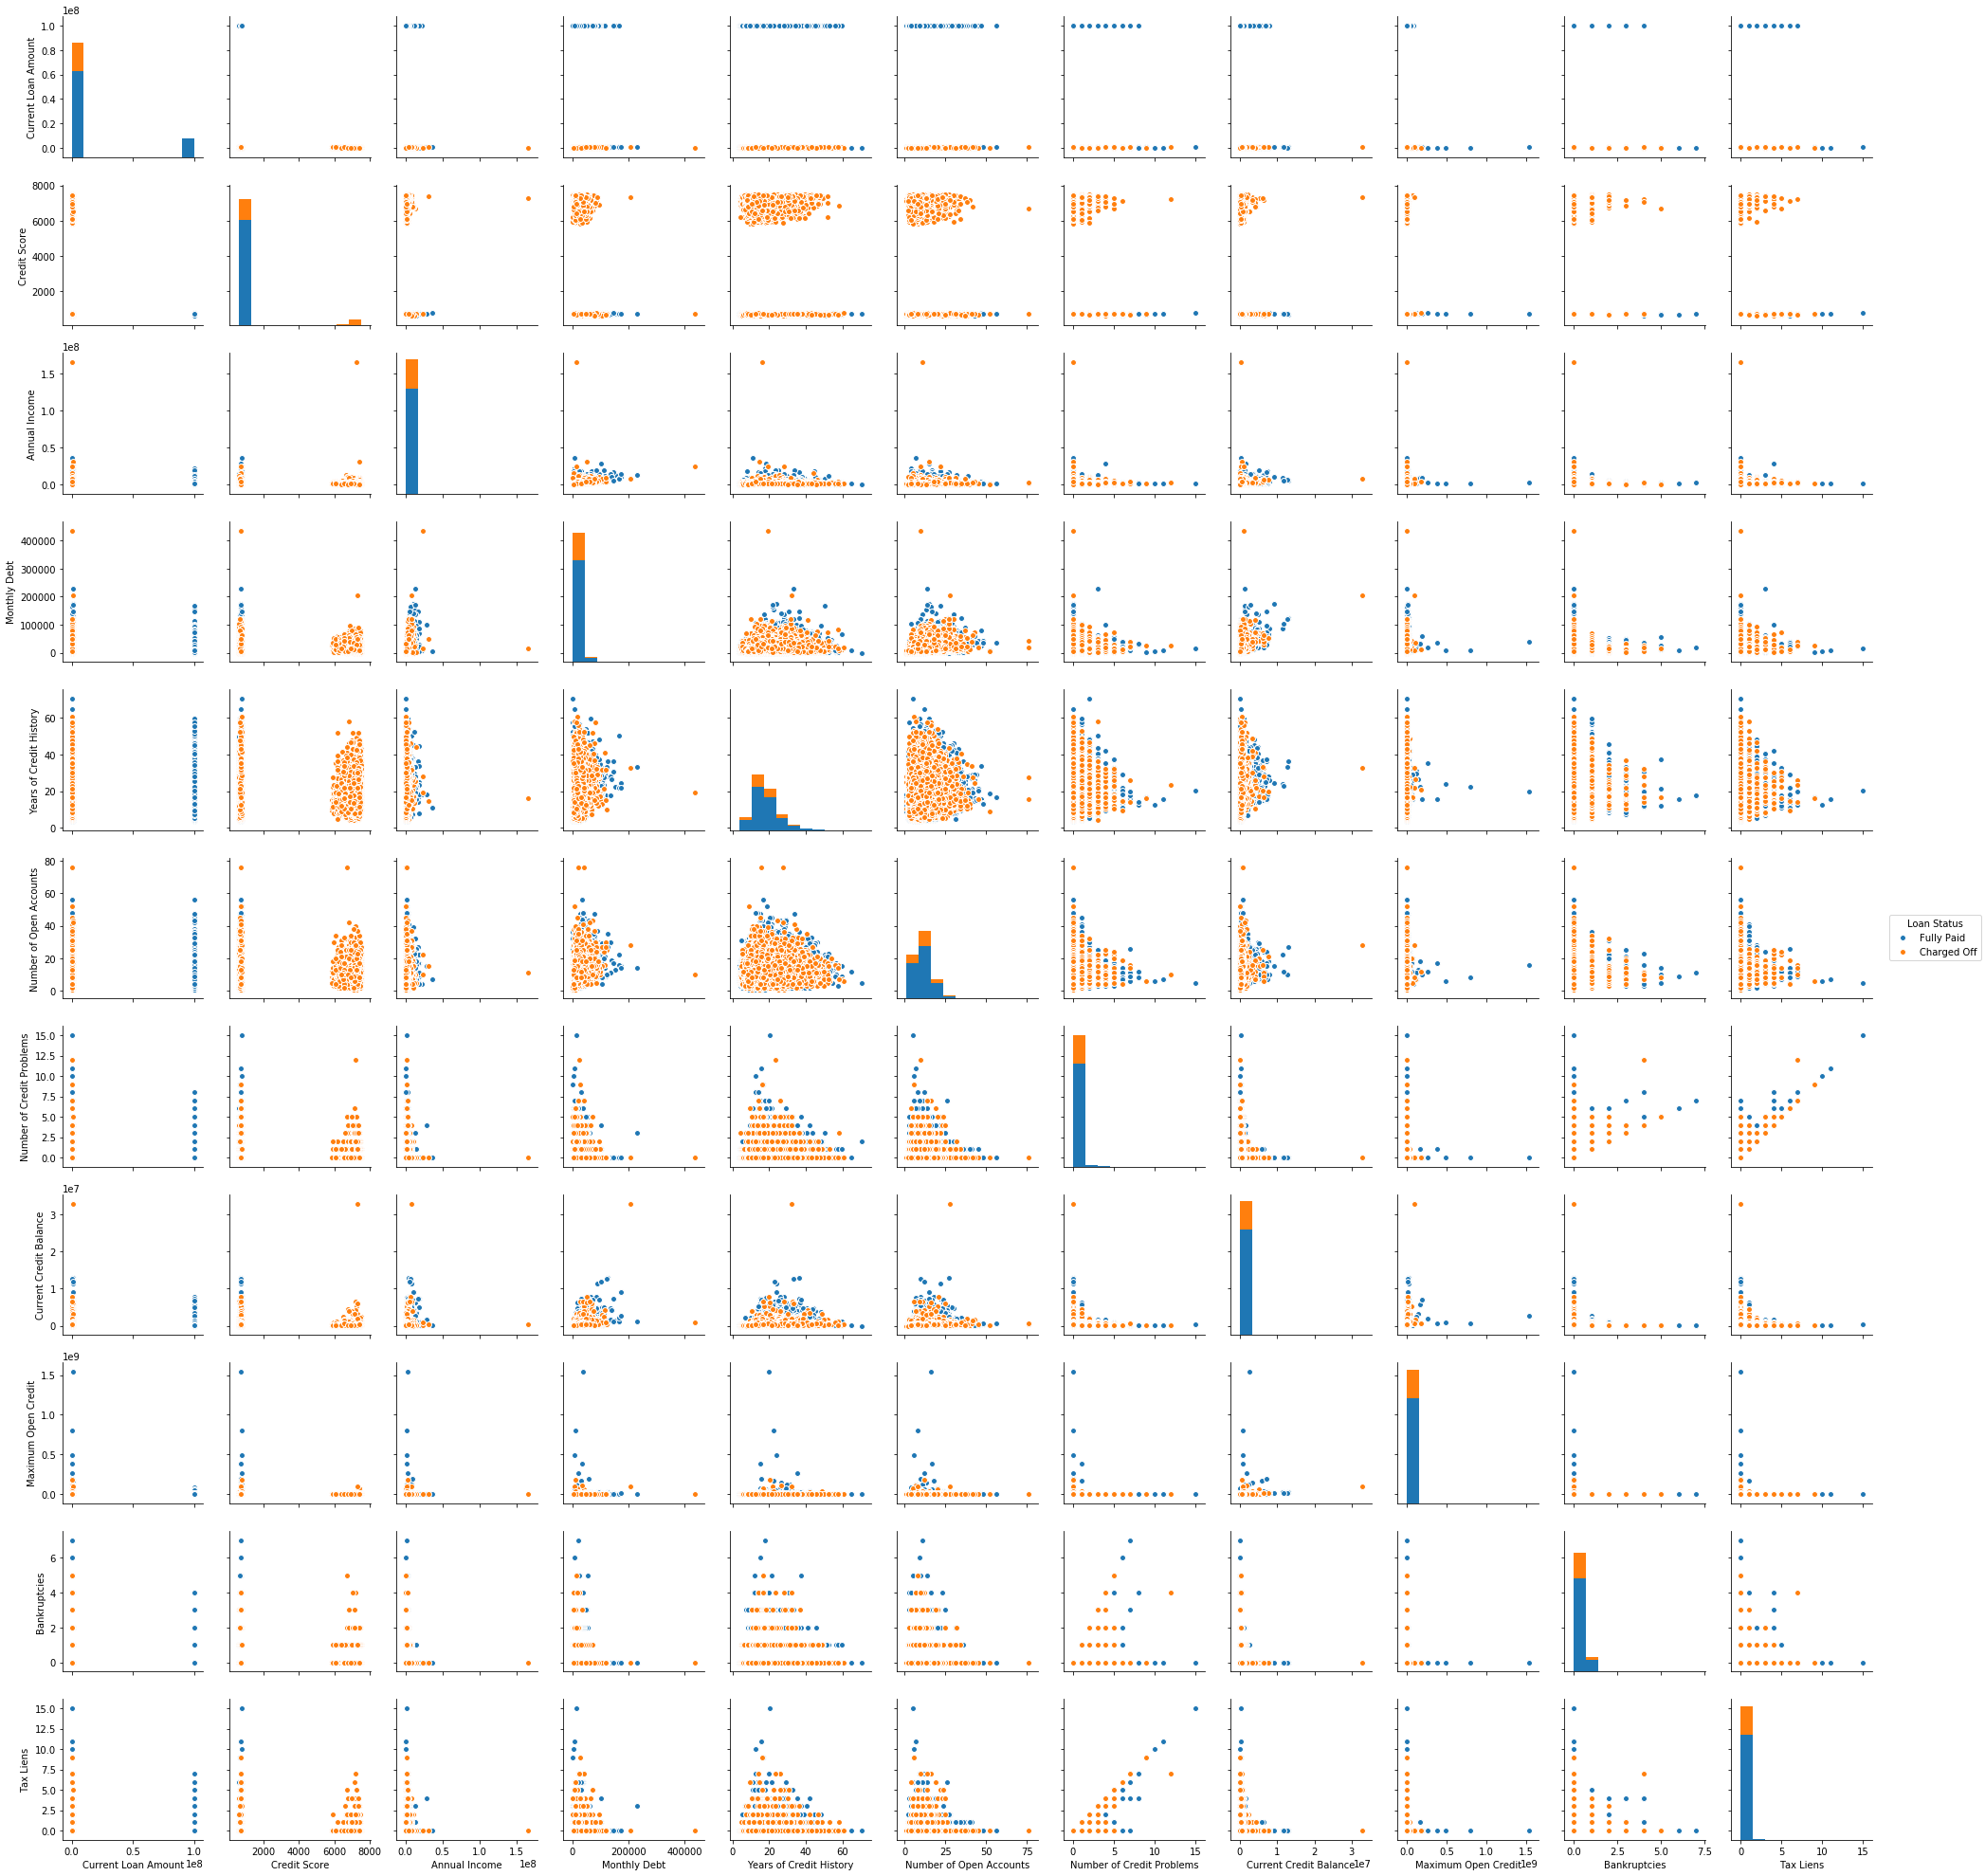

In [14]:
sns_plot = sns.pairplot(X,hue='Loan Status')

# Visualizing Outliers

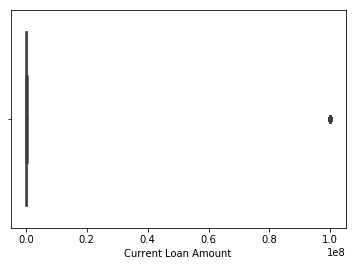

In [15]:
## outliers in Current Loan Amount
sns.boxplot('Current Loan Amount',data=df)

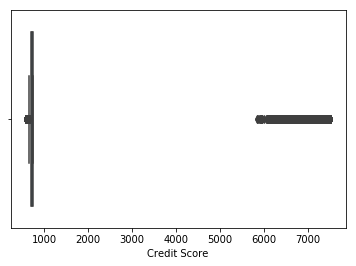

In [16]:
## outliers in Credit Score
sns.boxplot('Credit Score',data=df)

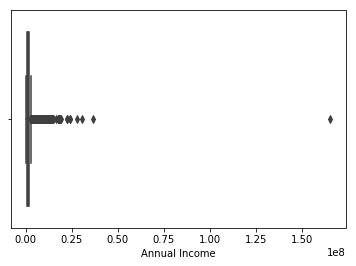

In [17]:
## outliers in Annual Income
sns.boxplot('Annual Income',data=df)

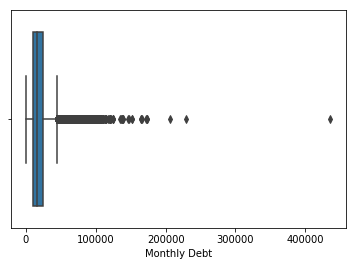

In [18]:
## outliers in Monthly Debt
sns.boxplot('Monthly Debt',data=df)

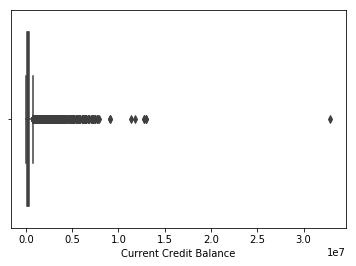

In [19]:
## outliers in Current Credit Balance
sns.boxplot('Current Credit Balance',data=df)

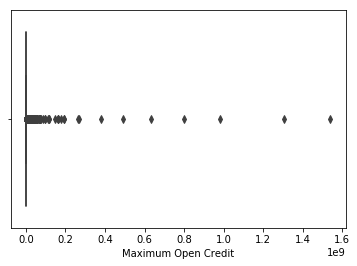

In [20]:
## outliers in Maximum Open Credit
sns.boxplot('Maximum Open Credit',data=df)

### We will replace the outliers value in Current Loan Amount with mean value of the feature. The outliers in Credit Score is removed by dividing the number greater than 900 by 10. We will use excel for this task also

# duplicate value in data

## duplicate rows

In [50]:
df_dup = df[df.duplicated()]
df_dup.shape

(10215, 19)

## unique values in features

In [63]:
df['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [64]:
df['Home Ownership'].value_counts()

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

### We see the other category is duplicated. One begins with small O and another begins with capital O. So, we can replace those using excel find and replace option. We will also replace the minority category which presence is less than 0.5% with other category.The Home Ownership feature also have duplicate category. The two category Home Mortgage and HaveMortgage represent same category. We will combine two different category into a single category i.e Home Mortgage. For this task also we can use excel find and replace option.

# Handling nan values

In [82]:
df_load =pd.read_excel(r"E:\Rabin\credit_train1.xlsx")

In [83]:
df_load.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
True Credit                     99897
True credit with nan            99920
curr loan amt without outl          0
dtype: int64

In [84]:
median = df_load['Credit Score'].median()
anninc_mean = df_load['Annual Income'].mean()
max_open_cre_med = df_load['Maximum Open Credit'].median()
bank_mode = df_load['Bankruptcies'].mode()
bank_mode=bank_mode[0]
tax_mode = df_load['Tax Liens'].mode()
tax_mode=tax_mode[0]
year_cur_mean=df_load['Years in current job'].mean()


In [85]:
df_load['Credit Score'].fillna(value=median,inplace=True)
df_load['Bankruptcies'].fillna(value=bank_mode,inplace=True)
df_load['Tax Liens'].fillna(value=tax_mode,inplace=True)
df_load['Annual Income'].fillna(value=anninc_mean,inplace=True)
df_load['Maximum Open Credit'].fillna(value=max_open_cre_med,inplace=True)
df_load['Years in current job'].fillna(value=year_cur_mean,inplace=True)

# Imbalance in data

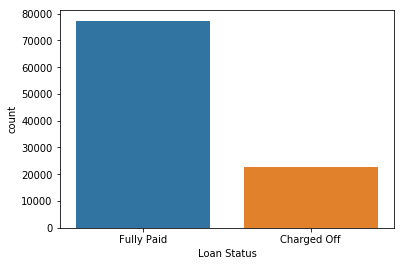

In [86]:
sns.countplot("Loan Status",data=df)

In [87]:
df['Loan Status'].value_counts(normalize=True)

Fully Paid     0.77361
Charged Off    0.22639
Name: Loan Status, dtype: float64

### we will use SMOTE to upsample the data. Upsampling will be done after splitting our data into train and test set

## removing outliers in Credit Score and duplicate row

In [88]:
for i in range(0,df_load.shape[0]):
    if df_load['Credit Score'][i] > 900:
        df_load['Credit Score'][i] = df_load['Credit Score'][i]/10
        

In [97]:
df_dup = df_load[df_load.duplicated()]
df_dup.shape

(10195, 22)

In [ ]:
df_load.drop(df_dup.index,inplace=True)
df_load.shape

# Looking for correlation in features

In [89]:
df_corr = df_load[['Current Loan Amount','Credit Score','Years in current job','Annual Income','Monthly Debt','Years of Credit History','Months since last delinquent','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]

In [90]:
df_corr.corr()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.187767,0.109182,0.299826,0.412727,0.148268,-0.035464,0.190907,-0.072367,0.313546,0.034777,-0.094489,0.016334
Credit Score,-0.187767,1.000000,-0.016127,-0.005056,-0.082713,0.069830,0.037754,-0.027662,-0.043526,-0.014735,0.013502,-0.031846,-0.019552
Years in current job,0.109182,-0.016127,1.000000,0.069976,0.128611,0.216431,-0.003855,0.052431,0.039635,0.097468,0.002009,0.038471,0.015623
Annual Income,0.299826,-0.005056,0.069976,1.000000,0.438402,0.145175,-0.069977,0.131936,-0.015453,0.284947,0.039205,-0.043031,0.037032
Monthly Debt,0.412727,-0.082713,0.128611,0.438402,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039267,-0.078494,0.020128
Years of Credit History,0.148268,0.069830,0.216431,0.145175,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.065911,0.017239
Months since last delinquent,-0.035464,0.037754,-0.003855,-0.069977,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008784,0.124678,0.012641
Number of Open Accounts,0.190907,-0.027662,0.052431,0.131936,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031342,-0.024385,0.006543
Number of Credit Problems,-0.072367,-0.043526,0.039635,-0.015453,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752859,0.581268
Current Credit Balance,0.313546,-0.014735,0.097468,0.284947,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139203,-0.122414,-0.015649


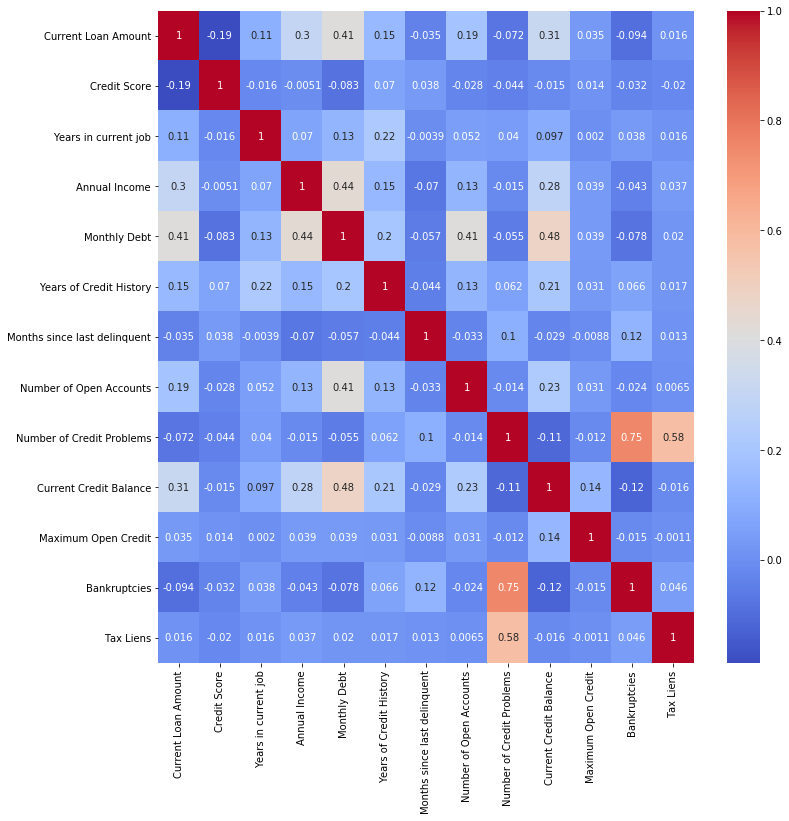

In [91]:
plt.figure(figsize=(12,12))
sns_corr = sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')

### calculating vif to remove multicollinearity

In [92]:
df_vif = df_load[['Current Loan Amount','Credit Score','Years in current job','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]
vif = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
for i in range(0,len(vif)):
    print("The vif for {} is {}".format(df_vif.columns[i],vif[i]))

The vif for Current Loan Amount is 5.216088749985775
The vif for Credit Score is 14.133526238670429
The vif for Years in current job is 4.285574183873071
The vif for Annual Income is 3.8662576896476977
The vif for Monthly Debt is 5.9926280268315
The vif for Years of Credit History is 8.723717621178784
The vif for Number of Open Accounts is 7.196910622526113
The vif for Number of Credit Problems is 8.399897979508326
The vif for Current Credit Balance is 2.253278721025104
The vif for Maximum Open Credit is 1.0296436972885672
The vif for Bankruptcies is 5.516843092735326
The vif for Tax Liens is 3.2920982116858917


In [93]:
df_load.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'True Credit',
       'True credit with nan', 'curr loan amt without outl'],
      dtype='object')

# saving only the necessary features

In [94]:
df_final = df_load[['Loan Status','Term','Current Loan Amount','Years in current job','Home Ownership','Purpose','Annual Income','Monthly Debt','Years of Credit History','Number of Open Accounts','Number of Credit Problems','Current Credit Balance','Maximum Open Credit','Bankruptcies','Tax Liens']]

In [96]:
df_final.to_csv("bank_loan_final.csv")